<a href="https://colab.research.google.com/github/Fasiloc/Machine_Learning_learn-repo/blob/main/Classes/Day_24_pg_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv('Dataset_spine.csv')

In [ ]:
df

,Col1,Col2,Col3,Col4,Col5,Col6,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Col1       310 non-null    float64
 1   Col2       310 non-null    float64
 2   Col3       310 non-null    float64
 3   Col4       310 non-null    float64
 4   Col5       310 non-null    float64
 5   Col6       310 non-null    float64
 6   Class_att  310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [ ]:
df['Class_att'].value_counts()

Abnormal    210
Normal      100
Name: Class_att, dtype: int64

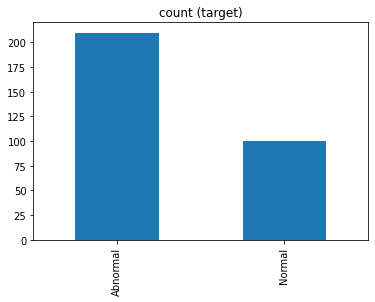

In [ ]:
df['Class_att'].value_counts().plot(kind='bar',title='count (target)')

In [ ]:
# class count
class_count_0,class_count_1 = df['Class_att'].value_counts()

#separate classes
class_0 = df[df['Class_att']=='Abnormal']
class_1 = df[df['Class_att']=='Normal'] 
# print shape of the class
print('class 0 :',class_0.shape)
print('class 1 :',class_1.shape)

class 0 : (210, 7)
class 1 : (100, 7)


total class of 1 and 0 : Normal      210
Abnormal    210
Name: Class_att, dtype: int64


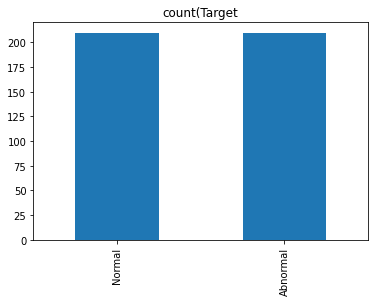

In [ ]:
class_1_over = class_1.sample(class_count_0,replace=True)

# means if input data is repeating or not
test_over = pd.concat([class_1_over,class_0],axis=0)
print('total class of 1 and 0 :',test_over['Class_att'].value_counts())

#plot the count after undersampling
test_over['Class_att'].value_counts().plot(kind='bar',title='count(Target')

In [ ]:
x = df.drop('Class_att',axis=1)
y = df['Class_att']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
sc = StandardScaler()

scaler = sc.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(20,10),
                        max_iter=400,activation='relu',
                        verbose=True,
                        solver='adam')

mlp_clf.fit(x_train_scaled,y_train)

Iteration 1, loss = 0.79296624
Iteration 2, loss = 0.78696947
Iteration 3, loss = 0.78126544
Iteration 4, loss = 0.77549009
Iteration 5, loss = 0.77024074
Iteration 6, loss = 0.76494128
Iteration 7, loss = 0.75958521
Iteration 8, loss = 0.75413870
Iteration 9, loss = 0.74867342
Iteration 10, loss = 0.74302469
Iteration 11, loss = 0.73727822
Iteration 12, loss = 0.73144820
Iteration 13, loss = 0.72569448
Iteration 14, loss = 0.71956324
Iteration 15, loss = 0.71381079
Iteration 16, loss = 0.70793372
Iteration 17, loss = 0.70174282
Iteration 18, loss = 0.69583582
Iteration 19, loss = 0.68947687
Iteration 20, loss = 0.68325002
Iteration 21, loss = 0.67672451
Iteration 22, loss = 0.67020435
Iteration 23, loss = 0.66341410
Iteration 24, loss = 0.65666427
Iteration 25, loss = 0.65002265
Iteration 26, loss = 0.64344967
Iteration 27, loss = 0.63637482
Iteration 28, loss = 0.62954552
Iteration 29, loss = 0.62298882
Iteration 30, loss = 0.61606961
Iteration 31, loss = 0.60887584
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=400, verbose=True)

In [ ]:
y_pred = mlp_clf.predict(x_test_scaled)
print('Accuracy : {:.5f}'.format(accuracy_score(y_test,y_pred)))

Accuracy : 0.87097
